In [ ]:
import tensorflow
from tensorflow import keras
import numpy as numpy
import matplotlib.pyplot as plt
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

AxesImage(54,36;334.8x217.44)


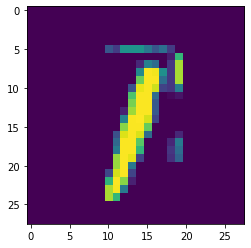

In [ ]:
print(plt.imshow(x_train[67]))

AxesImage(54,36;334.8x217.44)


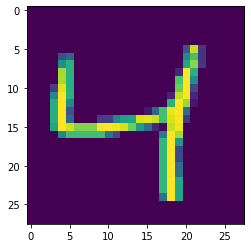

In [ ]:
print(plt.imshow(x_train[2]))

AxesImage(54,36;334.8x217.44)


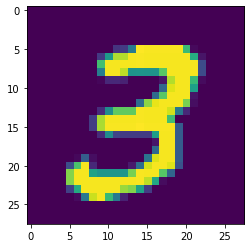

In [ ]:
print(plt.imshow(x_train[7]))

In [ ]:
# data not in shape so convert it
x_train = x_train/255
x_test = x_test/255

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 69s 45ms/step - loss: 0.3388 - accuracy: 0.8953 - val_loss: 0.0922 - val_accuracy: 0.9728
Epoch 2/10
1500/1500 [==============================] - 60s 40ms/step - loss: 0.1287 - accuracy: 0.9618 - val_loss: 0.0652 - val_accuracy: 0.9808
Epoch 3/10
1500/1500 [==============================] - 61s 40ms/step - loss: 0.0979 - accuracy: 0.9704 - val_loss: 0.0561 - val_accuracy: 0.9833
Epoch 4/10
1500/1500 [==============================] - 57s 38ms/step - loss: 0.0771 - accuracy: 0.9768 - val_loss: 0.0535 - val_accuracy: 0.9849
Epoch 5/10
1500/1500 [==============================] - 59s 39ms/step - loss: 0.0663 - accuracy: 0.9795 - val_loss: 0.0524 - val_accuracy: 0.9847
Epoch 6/10
1500/1500 [==============================] - 59s 39ms/step - loss: 0.0580 - accuracy: 0.9819 - val_loss: 0.0598 - val_accuracy: 0.9845
Epoch 7/10
1500/1500 [==============================] - 59s 39ms/step - loss: 0.0510 - accuracy: 0.9841 - val_loss: 0.0485 -

In [ ]:
y_pre = model.predict(x_test)
y_pred = y_pre.argmax(axis=1)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

313/313 [==============================] - 5s 17ms/step


0.9891

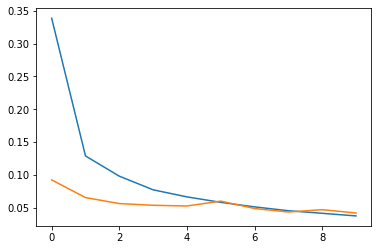

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

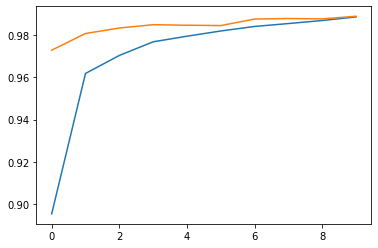

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
model.predict(x_test[17].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 20ms/step


array([7])

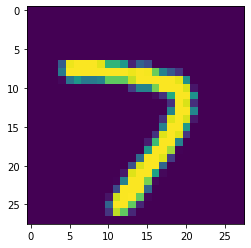

In [ ]:
plt.imshow(x_test[17])

In [ ]:
model.save("Handwritten digit classify using mnist dataset model.h5")